---
title: "Create table"
date: 2019-02-12T19:44:49+05:30
draft: true

---

In [1]:
import pandas as pd

## Create table

In [ ]:
-- create table world

CREATE TABLE world (
    -- column datatype
    country varchar(100),
    continent varchar(25),
    area int,
    population int,
    gdp int
)

In [12]:
df = pd.DataFrame(columns=['country', 'continent', 'area', 'population', 'gdp'])
df

,country,continent,area,population,gdp


In [ ]:
-- Get all column names and their data types from table

SELECT COLUMN_NAME, DATA_TYPE from master.INFORMATION_SCHEMA.COLUMNS
WHERE TABLE_NAME = N'world' -- Use "N" for handlling unicode string like varchar in ANSI(32bit) and nvarchar in unicode(64bit) 

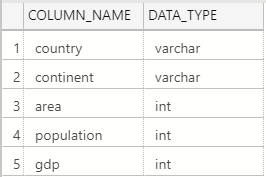

## Insert rows

In [2]:
INSERT INTO world (country, continent, area, population, gdp) 
VALUES ('Afghanistan', 'Asia', 647500, 31056997, 700),
       ('India', 'Asia', 3287590, 1095351995, 2900),
       ('China', 'Asia', 9596960, 1313973713, 5000),
       ('United States', 'North America', 9631420, 298444215, 37800),
       ('Brazil', 'South America', 8511965, 188078227, 7600),
       ('South Africa', 'Africa', 1219912, 44187637, 10700),
       ('France', 'Europe', 547030,	60876136, 27600)

In [20]:
tuples = [('Afghanistan', 'Asia', 647500, 31056997, 700),
          ('India', 'Asia', 3287590, 1095351995, 2900),
       ('China', 'Asia', 9596960, 1313973713, 5000),
       ('United States', 'North America', 9631420, 298444215, 37800),
       ('Brazil', 'South America', 8511965, 188078227, 7600),
       ('South Africa', 'Africa', 1219912, 44187637, 10700),
       ('France', 'Europe', 547030,	60876136, 27600)]

In [21]:
for i, e in enumerate(tuples):
    df.loc[i] = list(e)

## Select

In [ ]:
SELECT * FROM world

In [23]:
df

,country,continent,area,population,gdp
0,Afghanistan,Asia,647500,31056997,700
1,India,Asia,3287590,1095351995,2900
2,China,Asia,9596960,1313973713,5000
3,United States,North America,9631420,298444215,37800
4,Brazil,South America,8511965,188078227,7600
5,South Africa,Africa,1219912,44187637,10700
6,France,Europe,547030,60876136,27600


## Select Where

In [ ]:
-- get all Asian countries
SELECT * from world
where continent = 'Asia'

In [25]:
df.query("continent == 'Asia'")

,country,continent,area,population,gdp
0,Afghanistan,Asia,647500,31056997,700
1,India,Asia,3287590,1095351995,2900
2,China,Asia,9596960,1313973713,5000


## Order By

In [ ]:
-- Lowest gdp country
SELECT TOP 1 * FROM world
ORDER BY gdp

In [30]:
df.sort_values(by='gdp')[:1]

,country,continent,area,population,gdp
0,Afghanistan,Asia,647500,31056997,700


In [ ]:
-- Highest gdp country
SELECT TOP 1 * FROM world
ORDER BY gdp
DESC

In [29]:
df.sort_values(by='gdp', ascending=False)[:1]

,country,continent,area,population,gdp
3,United States,North America,9631420,298444215,37800


## Union

In [ ]:
-- Get the lowest and highest gdp country in single query
-- UNION operator is used to combine the result-set of two or more SELECT statements.
SELECT * FROM (select top(1) * from world order by gdp desc) a
UNION
SELECT * FROM (select top(1) * from world order by gdp asc) b

In [31]:
(df.sort_values(by='gdp')[:1]).append(df.sort_values(by='gdp', ascending=False)[:1])

,country,continent,area,population,gdp
0,Afghanistan,Asia,647500,31056997,700
3,United States,North America,9631420,298444215,37800
